# Lab 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.linalg as sls
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

## Problem 2

### 1)Calculate the covariance matrix of the sample X , say Σ . Find the eigenvectors and eigenvalues of Σ and plot it superimposed on the datapoints X.

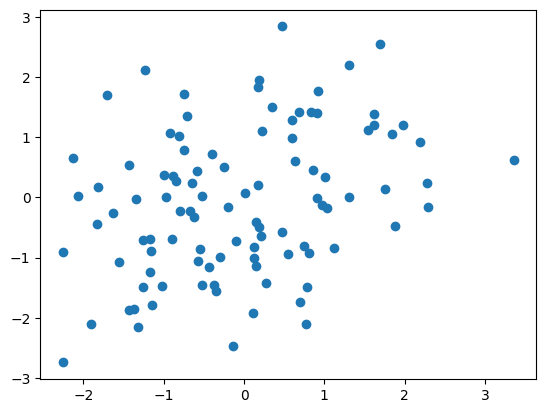

In [34]:
cov_mat = np.array([[1.5,0.5],[0.5,1.5]])
mean_mat = np.array([0,0])
X = np.random.multivariate_normal(mean_mat,cov_mat,100)
X = pd.DataFrame(data = X,columns = ["X","Y"])
plt.scatter(X["X"],X["Y"])


In [35]:
var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (X["X"].mean())
mean_val_y = (X["Y"].mean())
for i in range(100):
  sum_x += (X["X"][i] - mean_val_x)**2
  sum_y += (X["Y"][i] - mean_val_y)**2
var_x = sum_x/(99)
var_y = sum_y/(99)
for i in range(100):
  sum_xy += ((X["X"][i] - mean_val_x)*(X["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(99)
cov_mat_2 = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_2)

Covariance Matrix is 
[[1.3878951  0.46521831]
 [0.46521831 1.46738873]]


In [36]:
eig_val,eig_vec = np.linalg.eig(cov_mat_2)
print("eigen_values are \n",eig_val)
print()
print("eigen_vector is \n",eig_vec)

eigen_values are 
 [0.96072877 1.89455505]

eigen_vector is 
 [[-0.73658903 -0.6763406 ]
 [ 0.6763406  -0.73658903]]


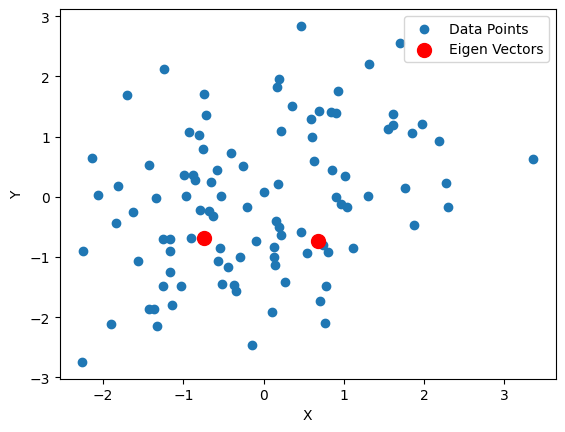

In [37]:
plt.scatter(X["X"],X["Y"],label='Data Points')
plt.scatter(eig_vec[:,0],eig_vec[:,1],color = 'r',label='Eigen Vectors',s=100)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 2)Perform the transformation Y = Σ on the datapoints X. Calculate the covariance matrix s−1/2X of transformed datapoints Y , say Σ . Comment on the obtained covariance matrix and infer Y what was the purpose of the transformation.

In [38]:
inv_mat = np.linalg.inv(cov_mat_2)
mat_req = sls.sqrtm(inv_mat)
print(mat_req)

[[ 0.88587731 -0.1463247 ]
 [-0.1463247   0.86087425]]


In [39]:
Xtrans = X.transpose()
Y_new_trans = np.dot(mat_req,Xtrans)
Y_new = Y_new_trans.transpose()
print(Y_new)

[[ 8.48180640e-01 -9.06752937e-01]
 [-1.98741868e+00  8.71545233e-01]
 [-1.40642789e+00  1.66926029e-02]
 [-9.95190441e-01 -1.39514185e+00]
 [-2.18705019e-01 -9.36945667e-01]
 [-1.56217001e-01 -1.12872380e-01]
 [-2.99482257e-01  4.76016772e-01]
 [-7.78278758e-02 -1.29537560e+00]
 [-8.94664915e-01 -1.09584374e+00]
 [ 1.82521010e-02 -6.13514864e-01]
 [ 5.00894072e-01 -5.65559683e-01]
 [ 9.45848446e-01 -3.04348705e-01]
 [ 2.41112995e-01 -4.54895685e-01]
 [-1.59854187e+00 -2.03108211e+00]
 [ 2.88380843e+00  4.57293262e-02]
 [ 8.46359470e-01  1.46518842e-01]
 [ 6.92786884e-01  2.61703675e-01]
 [-1.86178874e+00 -4.49790697e-01]
 [ 1.11088240e+00 -8.89775489e-01]
 [ 3.75271454e-01 -1.66936814e+00]
 [-9.10755672e-01  1.58529811e+00]
 [ 1.96164807e-01 -3.70470802e-01]
 [-8.55547270e-01 -8.99044067e-01]
 [ 1.15089515e+00 -1.79332592e-01]
 [ 9.07498853e-01 -1.39619200e+00]
 [ 3.89205832e-01  7.63808724e-01]
 [-6.92568660e-01 -1.11979250e+00]
 [ 1.57685090e+00  7.47291784e-01]
 [ 3.39706686e-01  1

In [40]:
Y_new_d = pd.DataFrame(data = Y_new,columns = ["X","Y"])
var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (Y_new_d["X"].mean())
mean_val_y = (Y_new_d["Y"].mean())
for i in range(100):
  sum_x += (Y_new_d["X"][i] - mean_val_x)**2
  sum_y += (Y_new_d["Y"][i] - mean_val_y)**2
var_x = sum_x/(99)
var_y = sum_y/(99)
for i in range(100):
  sum_xy += ((Y_new_d["X"][i] - mean_val_x)*(Y_new_d["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(99)
cov_mat_3 = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_3)

Covariance Matrix is 
[[1.00000000e+00 1.86158608e-16]
 [1.86158608e-16 1.00000000e+00]]


#### Comment on above result

##### The obtained covariance matrix is nearly an identity matrix.The purpose of the tranformation is that since the naive bayes assumes that the features are independent of each other so to minimize the correlation between the features we transform the matrix such that the covariance matrix becomes an identity matrix.

In [41]:
### The obtained covariance matrix is nearly an identity matrix.
### The purpose of the tranformation is that since the naive bayes assumes that the features are independent of each other so to 
### minimize the correlation between the features we transform the matrix such that the covariance matrix becomes an identity matrix.

### 3) Uniformly sample 10 points on the curve 𝑥 . Let these set of points be called . Plot x^2 + 𝑦^2 = 25 𝑃 points in P along with the datapoints in X. Make sure to give each point a different color [Hint : You can use properties like hue to do this] for better visualization. Report the eucledian distance of each point from µ using barplot.


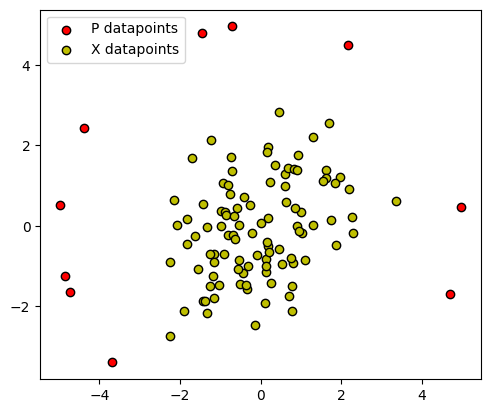

In [42]:

l = []
for i in range(10):
  theta = np.random.uniform(0,2*math.pi)
  arr = [5*math.cos(theta),5*math.sin(theta)]
  l.append(arr)
P = np.array(l)
P = pd.DataFrame(data = P,columns = ["X","Y"])

figure, axes = plt.subplots( 1 )
axes.scatter(P["X"],P["Y"],color = 'r',label = 'P datapoints',edgecolors='black')
axes.scatter(X["X"],X["Y"],color = 'y',label = 'X datapoints',edgecolors='black')
axes.set_aspect('equal', adjustable='box')
axes.legend()
plt.show()


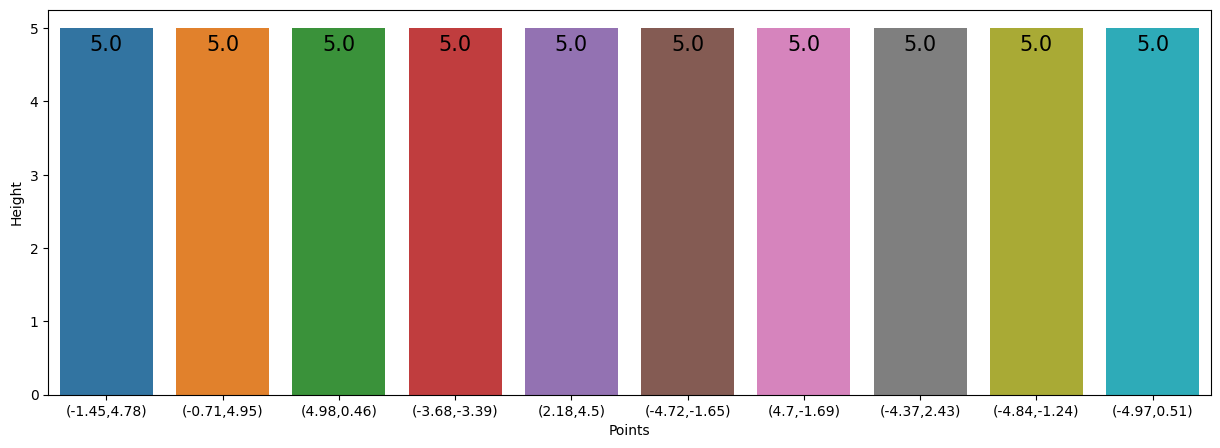

In [43]:

mean_val_x_P = P["X"].mean()
mean_val_y_P = P["Y"].mean()
mean_mat_P = np.array([mean_val_x_P,mean_val_y_P])
arr = []
for i in P.index:
  dis = ((0- P.iloc[i]["X"])**2 + (0 - P.iloc[i]["Y"])**2)**0.5
  arr.append(dis)
points = {}
for i in range(10):
  point = "("+str(round(P.iloc[i]["X"],2))+","+str(round(P.iloc[i]["Y"],2))+")"
  points[point] = arr[i]
plt.figure(figsize = (15, 5))
dataf = pd.DataFrame(data = points.items(),columns = ["Points","Height"])
bplot = sns.barplot(x="Points",y="Height",data = dataf)
for b in bplot.patches:
    bplot.annotate(format(b.get_height(), '.1f'), (b.get_x() + b.get_width() / 2., b.get_height()),  ha = 'center', va = 'center', size=15,xytext = (0, -12), textcoords = 'offset points')
plt.show()



### 4)  Perform the transformation 𝑄 = Σ𝑠−1/2 𝑃 on the datapoints P. Calculate the eucledian distance of transformed datapoints Q from µ and report it using barplot . Plot points in Q along with datapoints in Y. Make sure that the color of point before and transformation doesn’t change. Comment on the difference in eucledian distance before and after transformations of the points in P


In [44]:

var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (P["X"].mean())
mean_val_y = (P["Y"].mean())
for i in range(10):
  sum_x += (P["X"][i] - mean_val_x)**2
  sum_y += (P["Y"][i] - mean_val_y)**2
var_x = sum_x/(9)
var_y = sum_y/(9)
for i in range(10):
  sum_xy += ((P["X"][i] - mean_val_x)*(P["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(9)
cov_mat_P = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_P)


Covariance Matrix is 
[[15.6410956   2.1334287 ]
 [ 2.1334287   9.25280338]]


In [45]:

inv_mat_P = np.linalg.inv(cov_mat_P)
mat_req_P = sls.sqrtm(inv_mat_P)
print(mat_req_P)


[[ 0.2556201  -0.02585534]
 [-0.02585534  0.33304077]]


In [46]:

Ptrans = P.transpose()
Y_new_trans_P = np.dot(mat_req_P,Ptrans)
Y_new_P = Y_new_trans_P.transpose()
Q = pd.DataFrame(data = Y_new_P,columns = ["X","Y"])
Q


,X,Y
0,-0.495282,1.630858
1,-0.309297,1.666701
2,1.260702,0.025046
3,-0.851929,-1.033852
4,0.440304,1.442652
5,-1.163793,-0.427624
6,1.246421,-0.685260
7,-1.179918,0.922047
8,-1.206422,-0.286577
9,-1.284619,0.299716


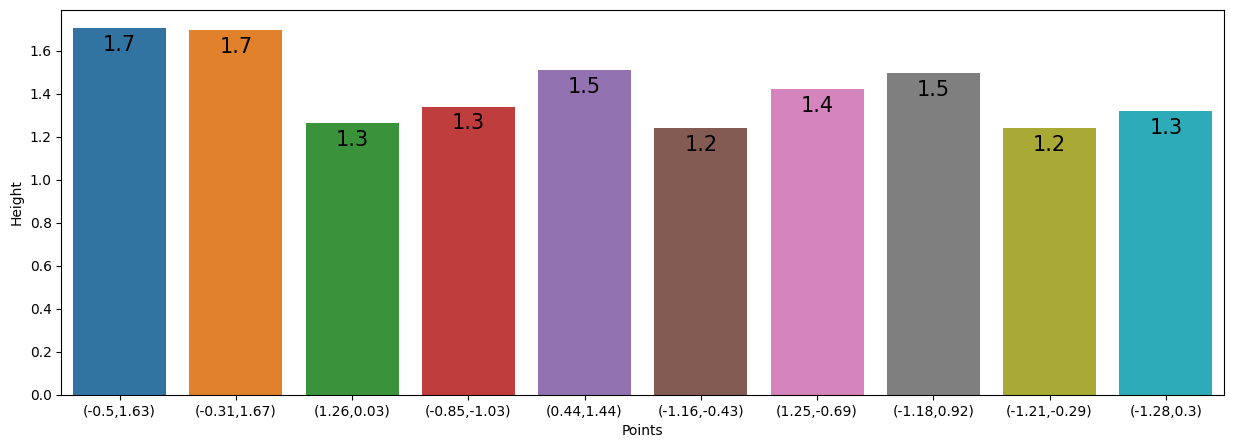

In [53]:

mean_val_x_Q = Q["X"].mean()
mean_val_y_Q = Q["Y"].mean()
mean_mat_Q = np.array([mean_val_x_Q,mean_val_y_Q])
arr_Q = []
for i in Q.index:
  dis = ((0 - Q.iloc[i]["X"])**2 + (0 - Q.iloc[i]["Y"])**2)**0.5
  arr_Q.append(dis)
points_Q = {}
for i in range(10):
  point = "("+str(round(Q.iloc[i]["X"],2))+","+str(round(Q.iloc[i]["Y"],2))+")"
  points_Q[point] = arr_Q[i]
plt.figure(figsize = (15, 5))
dataf_Q = pd.DataFrame(data = points_Q.items(),columns = ["Points","Height"])
bplot = sns.barplot(x="Points",y="Height",data = dataf_Q)
for b in bplot.patches:
    bplot.annotate(format(b.get_height(), '.1f'), (b.get_x() + b.get_width() / 2., b.get_height()),  ha = 'center', va = 'center', size=15,xytext = (0, -12), textcoords = 'offset points')
plt.show()

# Problem 1

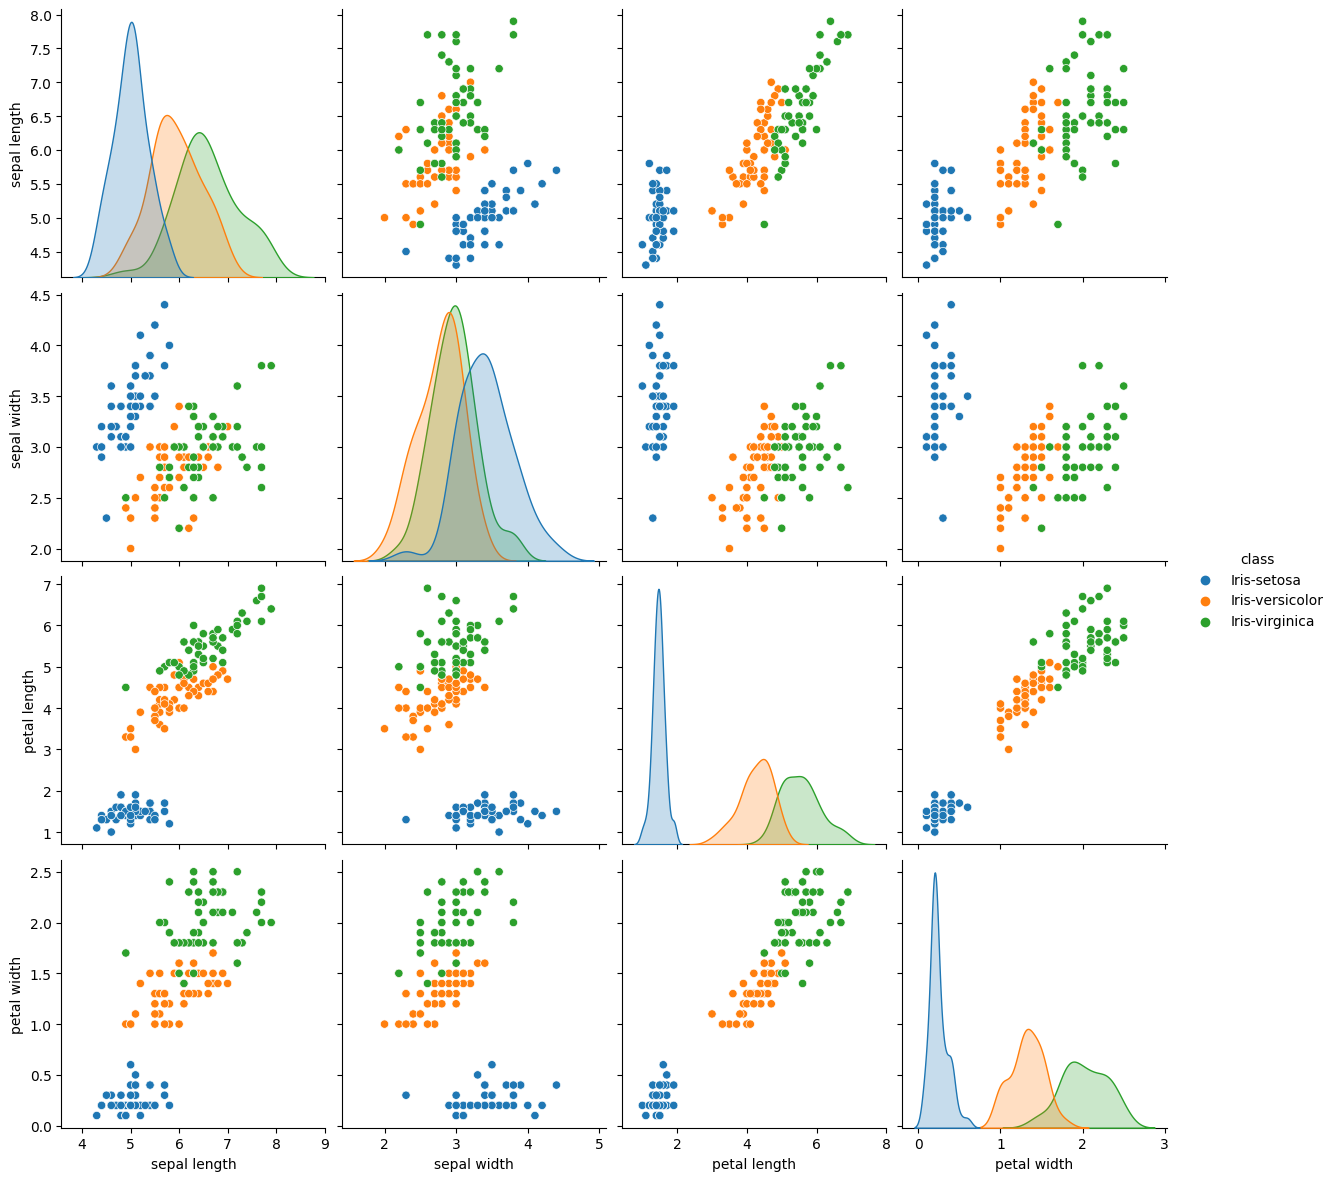

In [2]:
dataset = pd.read_csv("D:\IIT Jodhpur CSE\IV SEMESTER II YEAR\PRML\Lab2\irisdataset.csv",names = ["sepal length","sepal width","petal length","petal width","class"])
iris = pd.DataFrame(data = dataset)
X = iris.copy()
X = X.dropna()
lb = LabelEncoder()
X["class"] = lb.fit_transform(X["class"])
Y = X["class"]
X = X.drop("class",axis=1)
iplot = sns.pairplot(iris,hue="class",height = 3)
plt.show()


## Implement a Gaussian Bayes Classifier class from scratch.(You are not allowed to use the inbuilt scikit function, you are only allowed to use numpy and pandas). The classifier class must have 3 variants defined using its constructor, for each of the cases given below.

In [3]:
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True)

Case 1
{'Score': 0.9555555555555556}


C:\Users\hp\AppData\Local\Temp\ipykernel_14204\4275578714.py:90: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)


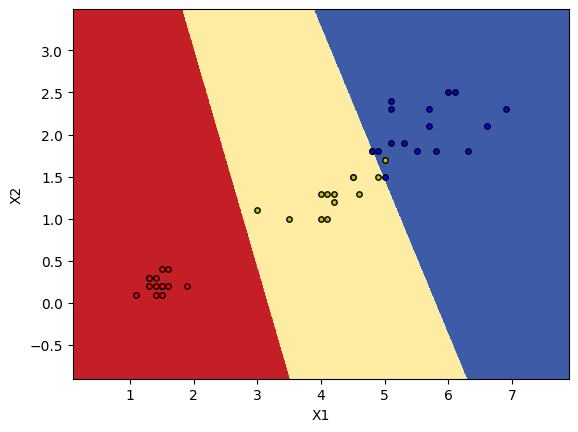

Case 2
{'Score': 0.8222222222222222}


C:\Users\hp\AppData\Local\Temp\ipykernel_14204\4275578714.py:90: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)


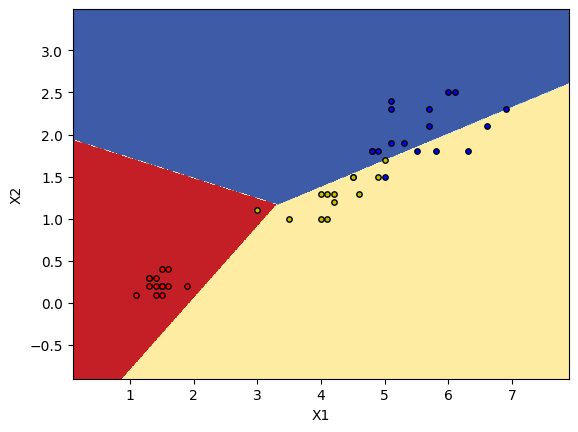

Case 3
{'Score': 0.9555555555555556}


C:\Users\hp\AppData\Local\Temp\ipykernel_14204\4275578714.py:90: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)


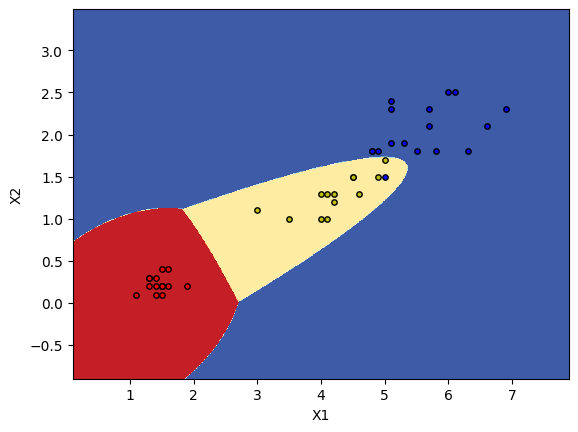

In [7]:
class Gaussian_Bayes_Classifier:
  class_prob = []
  cov_mat = np.array([])
  def __init__(self,matrix = None):
    self.matrix = matrix
    self.class_prob = []
    self.cov_mat = np.array([])
  def Train(self,X,Y):
    self.classes = np.unique(Y)
    self.means_arr = []
    self.vars_arr = []
    for _class in self.classes:
      X_class = X[Y==_class]
      mean_val = np.mean(X_class,axis = 0)
      self.means_arr.append(mean_val)
      var_val = np.var(X_class,axis = 0)
      self.vars_arr.append(var_val)
    self.means_arr = np.array(self.means_arr)
    self.vars_arr = np.array(self.vars_arr)
    for i in self.classes:
      prob = len(np.where(Y==i)[0])/len(Y)
      self.class_prob.append(prob)
    self.cov_mat = np.zeros((len(self.classes),X.shape[1],X.shape[1]))
    if(self.matrix == 1):
      self.cov_mat = (self.vars_arr[0][0])*np.identity(X.shape[1])
    elif(self.matrix == 2):
      self.cov_mat = X.cov()
      self.cov_mat = np.array(self.cov_mat)
    elif(self.matrix == 3):
      for j in range(len(self.classes)):
          X_cov_cls = X[Y==j]
          mat = X_cov_cls.cov()
          self.cov_mat[j] = mat
  def probability(self,vec,d,mean,cov):
    mat = vec - mean
    sigma= np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    const = 0
    try:
      const = (1/(((2*math.pi)**(d/2))*(sigma)))
    except:
      const = 0
    # print(const)
    req = (mat)@(inv_cov)@(mat.transpose())
    prob = const*(math.exp(-0.5*(req[0][0])))
    return prob
  def Test(self,X,Y):
    Y_pred = Y.to_numpy()
    Clss = []
    for i in range(len(X.index)):
      class_req = self.Predict(X.iloc[[i]])
      Clss.append(class_req)
    cnt = 0
    for i in range(len(Clss)):
      if(Clss[i] != Y_pred[i]):
        cnt += 1
    return(Clss,{'Score': 1 - (cnt/len(Y_pred))})

  def Predict(self,X,cov_mat_x = cov_mat):
    _X = X.to_numpy()
    arr = []
    for j in range(len(self.classes)):
      if(self.matrix == 3):
        cov_mat_x = self.cov_mat[j]
      else:
        cov_mat_x = self.cov_mat
      prob = self.probability(vec = _X,d = X.shape[1],mean = self.means_arr[j],cov = cov_mat_x)
      arr.append(prob)
    return(arr.index(max(arr)))
  def Plot_Decision_Boundary(self,X,Y):
    X = X.to_numpy()
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
    Z = self.Test(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]),pd.DataFrame(np.zeros((np.c_[xx.ravel(), yy.ravel()].shape[0],1))))
    ZZ = np.array(Z[0])
    ZZ = ZZ.reshape(xx.shape)
    cs = plt.contourf(xx, yy, ZZ, cmap=plt.cm.RdYlBu)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plot_colors = 'ryb'
    # Plot the training points
    for i, color in zip(range(len(self.classes)), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
    plt.show()
    return
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True) 
for i in range(1,4):
  model = Gaussian_Bayes_Classifier(matrix = i)
  model.Train(X_train[["petal length","petal width"]],Y_train)
  # pred = model.Test(X,Y)
  pred1 = model.Test(X_test[["petal length","petal width"]],Y_test)
  print("Case",i)
  print(pred1[1])
  model.Plot_Decision_Boundary(X_test[["petal length","petal width"]],Y_test)